## Imports

In [97]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 487.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 655.4 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer


## Read in data

## Data

In [14]:
###https://www.kaggle.com/datasets/nandini1999/perfume-recommendation-dataset?select=final_perfume_data.csv

#### Data Overview
#####    Name: The name of the perfume.
#####    Brand: The brand producing the perfume.
#####    Description: A detailed description of the perfume.
#####    Notes: The fragrance notes included in the perfume.
#####    Image URL: A link to an image of the perfume.

In [16]:
df = pd.read_csv("final_perfume_data.csv", encoding='unicode_escape')

In [17]:
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [22]:
df.dtypes

Name           object
Brand          object
Description    object
Notes          object
Image URL      object
dtype: object

In [24]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes', 'Image URL'], dtype='object')

In [26]:
df.shape

(2191, 5)

In [28]:
df = df.drop(columns="Image URL")

In [30]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes'], dtype='object')

## Pre-processing

In [33]:
df.isna().sum()

Name            0
Brand           0
Description     0
Notes          80
dtype: int64

In [35]:
## keeping the og df just in case!
df_drop = df.dropna

In [25]:
## trying out how to seperate the notes!! :D
## i referenced code from the anime demo, please feel free to change this to something better! - sky
## changing it to a commma with a space after adds more scents, but it adds one like "your guess is as good as ours." lol
## some scents are definitely missing with this!!!
df_enc = df.join(pd.concat([df['Notes'].str.get_dummies(sep=',')])).drop('Notes',axis=1)

In [26]:
df_enc.shape

(2191, 4005)

In [27]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [29]:
note_melt = pd.melt(df_enc, id_vars=None,
     value_vars=['   Amber and Canadian Fir Balsam',
       '   Caramel', '   Clary Sage', '   Ethiopian Myrrh',
       '   Geranium Flower', '   Guaiac Wood',
       'jasmine', 'lemony', 'lily', 'ocean', 'oolong', 'red berries', 'sage',
       'spiced plums', 'tobacco', 'vanilla'],
     var_name='Notes', value_name='Scent')

Text(0.5, 1.0, 'Ratio of Notes')

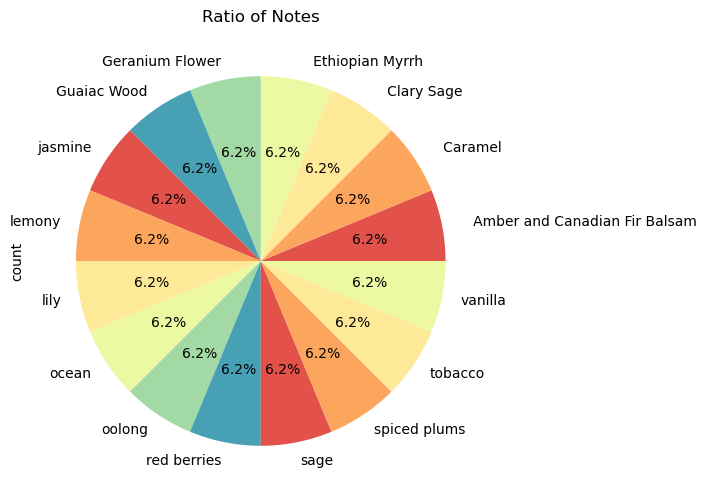

In [53]:
## pie chart of notes to start
plt.figure(figsize=(10,6))
note_melt['Notes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Spectral"))
plt.title('Ratio of Notes')

In [61]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


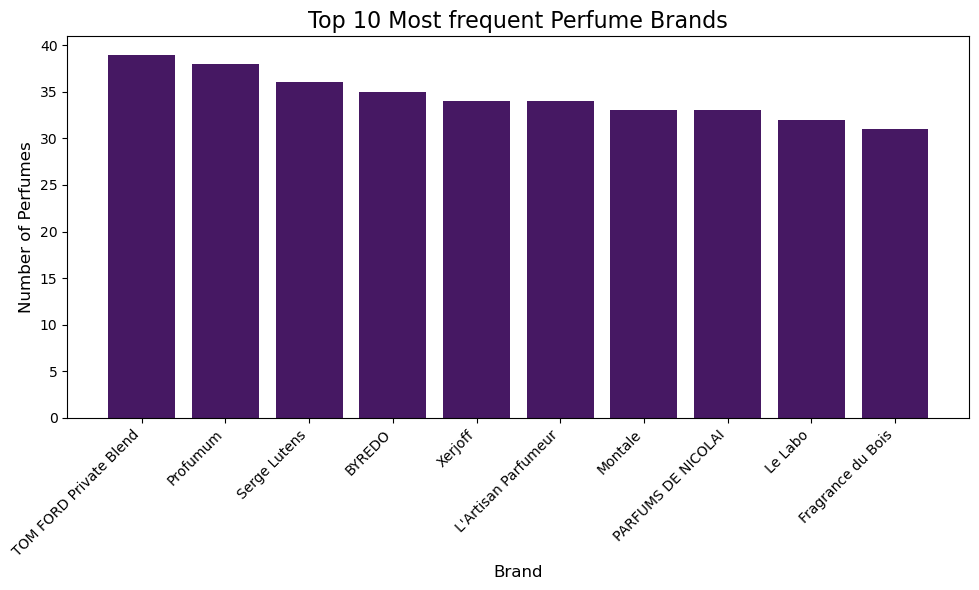

In [152]:
import matplotlib.pyplot as plt

# counting the occurrences of each brand
brand_counts = df['Brand'].value_counts().head(10)  # Top 10 most frequent brands

# plotting a bar chart of the most frequent brands
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values, color = '#461863')
plt.title('Top 10 Most frequent Perfume Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Build word cloud for the Notes feature

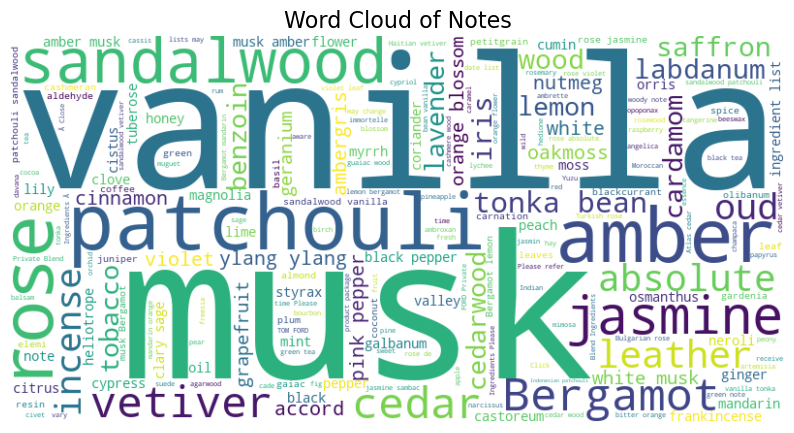

In [49]:
# combining all the notes into a single string
notes = " ".join(df['Notes'].dropna().astype(str).values)  
# word cloud
wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    height=400,
    width=800,
    colormap='viridis' 
)

# displaying the word cloud
word_cloud = wc.generate(notes)
plt.figure(figsize=(10, 7))  # Adjust figure size for better visualization
plt.imshow(word_cloud, interpolation='bilinear')  # Better rendering
plt.axis("off")  # Turn off axis for cleaner display
plt.title("Word Cloud of Notes", fontsize=16)
plt.show()

# Combine 'Description' and 'Notes' columns for feature extraction

In [56]:
df['Combined_Features'] = df['Description'].fillna('') + ' ' + df['Notes'].fillna('')

In [58]:
df['Combined_Features'].head()

0     Rapa Nui for sugar, Tihota is, quite simply, ...
1     A tribute to the expanse of space extending f...
2     An aromatic ode to the ancient beauty of Japa...
3     Velvet Fantasy is a solar fragrance where cit...
4     There's no way A Lab On Fire could relocate t...
Name: Combined_Features, dtype: object

In [62]:
# The CountVectorizer is a feature extraction method in scikit-learn that converts text data into a bag-of-words representation, 
# which is commonly used in natural language processing tasks. 
# stop_words='english': filters out common English stopwords (e.g., "the," "and," "is") to focus on the meaningful words.
count_vectorizer = CountVectorizer(stop_words='english')

In [64]:
# converting combined features text into numerical values
count_matrix = count_vectorizer.fit_transform(df['Combined_Features'])

In [74]:
count_matrix

<2191x18802 sparse matrix of type '<class 'numpy.int64'>'
	with 169832 stored elements in Compressed Sparse Row format>

In [76]:
# computing cosine similarity matrix
# suggesting similar items (e.g., perfumes in this case) based on cosine similarity.
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#### Function definition
##### perfume_name: Name of the perfume for which recommendations are requested
##### num_recommendations: Number of recommendations to return (default: 5)

In [118]:
def recommend_perfumes(perfume_name, num_recommendations=5):
    # Find the index of the perfume with a name that contains the given perfume_name

    # initializing perfume_idx as None
    perfume_idx = None

    # looping through the dataframe to find the matching perfume
    for idx, name in enumerate(df['Name']):
        if perfume_name.lower() in str(name).lower():
            perfume_idx = idx
        break  # Exit the loop once a match is found
    
    # If no matching perfume is found, return a message
    if perfume_idx is None:
        return f"No perfume found with the name '{perfume_name}'."
    
    # get similarity scores for the input perfume
    sim_scores = [(i, score) for i, score in enumerate(cosine_sim[perfume_idx])]

    # sorting the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # leave the first element and get the top recommendations
    sim_scores = sim_scores[1:num_recommendations + 1]
    
    # find the indices of the recommended perfumes
    recommended_indices = [idx for idx, _ in sim_scores]
    
    # get rows for the recommended perfumes
    recommended_perfumes = df.iloc[recommended_indices]

    # selecting the name and brand columns
    result = recommended_perfumes[['Name', 'Brand']]

    return result; 

In [120]:
# Test the recommender system
recommendations = recommend_perfumes('Tihota', num_recommendations=3)
print(recommendations)

                              Name               Brand
2083  Vanille Absolu Eau de Parfum             Montale
1481   Vanilla Flash Eau de Parfum          Tauerville
2134   Vanille Tonka Eau de Parfum  PARFUMS DE NICOLAI


In [122]:
# Test the recommender system
recommendations = recommend_perfumes('XYZ', num_recommendations=3)
print(recommendations)

No perfume found with the name 'XYZ'.
